# Video Inference Demo

In [5]:
import cv2
import mmcv
from mmcv.transforms import Compose
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.utils import register_all_modules
from mmdet.apis import init_detector, inference_detector
from mmdet.apis import DetInferencer


In [6]:
# Specify the path to model config and checkpoint file
config_file = "E:\Current_Workdir\Portfolios\Weapon-Object-Detection\\tmp\\1712903603.213322-weapon_detection_yolox\mmdet_image\config.py"
checkpoint_file = ".\\model\\mmdet_image\\model.pth"

In [7]:
print(config_file)
print(checkpoint_file)

E:\Current_Workdir\Portfolios\Weapon-Object-Detection\tmp\1712903603.213322-weapon_detection_yolox\mmdet_image\config.py
.\model\mmdet_image\model.pth


In [9]:
# from mmcv import Config

# config_file = 'configs/yolox/yolox_l_8xb8-300e_coco.py'
# cfg = Config.fromfile(config_file)

# print(cfg.model)

In [8]:
# dependency bug: https://github.com/open-mmlab/mmdetection/issues/10127
# you gotta make sure you got the proper mmdetection version (i'm currently trying to load MMDet 2.0 config on an MMDet 3.0)
# f*** i gotta reinstall everything: https://auto.gluon.ai/stable/install-modules.html
#model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [8]:
# https://mmdetection.readthedocs.io/en/latest/user_guides/inference.html
model = DetInferencer(model=config_file, weights=checkpoint_file,device='cuda:0')

ValueError: Cannot find model: e:\current_workdir\portfolios\weapon-object-detection\tmp\1712903603.213322-weapon_detection_yolox\mmdet_image\config.py in mmdet

In [30]:
# visualizer = VISUALIZERS.build(model.cfg.visualizer)

In [33]:
result = model(r"E:\Current_Workdir\Portfolios\Weapon-Object-Detection\remapped-train-80-val-20_coco\test\youtube-52_jpg.rf.1aa86014a4148ab8053185e7553a1151.jpg")
print(result)

e:\Programs\miniforge3\envs\ag_stable\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

{'predictions': [{'labels': [31, 16, 62, 76, 31, 40, 61, 70, 41, 25, 35, 31, 76, 26, 48, 38, 34, 41, 34, 26, 38, 9, 31, 76, 61, 76, 5, 76, 39, 5, 62], 'scores': [0.8758748769760132, 0.873266875743866, 0.7939965724945068, 0.21048149466514587, 0.12610752880573273, 0.08401321619749069, 0.07381053268909454, 0.059868477284908295, 0.05811258777976036, 0.047326866537332535, 0.041932377964258194, 0.04023297503590584, 0.028593899682164192, 0.027291810140013695, 0.025477219372987747, 0.024771546944975853, 0.024268299341201782, 0.023891933262348175, 0.022716283798217773, 0.019645940512418747, 0.019031142815947533, 0.017273826524615288, 0.01569014973938465, 0.014503858983516693, 0.013961893506348133, 0.013518107123672962, 0.013377266936004162, 0.012791212648153305, 0.012294808402657509, 0.011917738243937492, 0.011128752492368221], 'bboxes': [[200.89125061035156, 273.5168151855469, 231.3408660888672, 350.0414123535156], [201.0163116455078, 274.70550537109375, 231.7650604248047, 350.53436279296875],

In [15]:
import json
from autogluon.multimodal.presets import get_automm_presets

hyperparameters, hyperparameter_tune_kwargs = get_automm_presets(problem_type="text_similarity", presets="medium_quality")
print(f"hyperparameters: {json.dumps(hyperparameters, sort_keys=True, indent=4)}")
print(f"hyperparameter_tune_kwargs: {json.dumps(hyperparameter_tune_kwargs, sort_keys=True, indent=4)}")

hyperparameters: {
    "data.categorical.convert_to_text": true,
    "data.numerical.convert_to_text": true,
    "model.hf_text.checkpoint_name": "sentence-transformers/all-MiniLM-L6-v2",
    "model.hf_text.pooling_mode": "mean",
    "model.names": [
        "hf_text"
    ]
}
hyperparameter_tune_kwargs: {}


In [1]:
from mmengine.hub import get_config

cfg = get_config('mmdet::yolox/yolox_l_8xb8-300e_coco.py')

e:\Programs\miniforge3\envs\ag_stable\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(cfg.pretty_text)

auto_scale_lr = dict(base_batch_size=64, enable=False)
backend_args = None
base_lr = 0.01
custom_hooks = [
    dict(num_last_epochs=15, priority=48, type='YOLOXModeSwitchHook'),
    dict(priority=48, type='SyncNormHook'),
    dict(
        ema_type='ExpMomentumEMA',
        momentum=0.0001,
        priority=49,
        type='EMAHook',
        update_buffers=True),
]
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=10, max_keep_ckpts=3, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_scale = (
    640,
    640,
)
img_scales = [
    (
        640,
   

In [3]:
cfg.model.bbox_head.num_classes=4

In [4]:
print(cfg.pretty_text)

auto_scale_lr = dict(base_batch_size=64, enable=False)
backend_args = None
base_lr = 0.01
custom_hooks = [
    dict(num_last_epochs=15, priority=48, type='YOLOXModeSwitchHook'),
    dict(priority=48, type='SyncNormHook'),
    dict(
        ema_type='ExpMomentumEMA',
        momentum=0.0001,
        priority=49,
        type='EMAHook',
        update_buffers=True),
]
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=10, max_keep_ckpts=3, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_scale = (
    640,
    640,
)
img_scales = [
    (
        640,
   

In [5]:
cfg

Config (path: e:\programs\miniforge3\envs\ag_stable\lib\site-packages\mmdet\.mim\configs/yolox/yolox_l_8xb8-300e_coco.py): {'train_cfg': {'type': 'EpochBasedTrainLoop', 'max_epochs': 300, 'val_interval': 10}, 'val_cfg': {'type': 'ValLoop'}, 'test_cfg': {'type': 'TestLoop'}, 'param_scheduler': [{'type': 'mmdet.QuadraticWarmupLR', 'by_epoch': True, 'begin': 0, 'end': 5, 'convert_to_iter_based': True}, {'type': 'CosineAnnealingLR', 'eta_min': 0.0005, 'begin': 5, 'T_max': 285, 'end': 285, 'by_epoch': True, 'convert_to_iter_based': True}, {'type': 'ConstantLR', 'by_epoch': True, 'factor': 1, 'begin': 285, 'end': 300}], 'optim_wrapper': {'type': 'OptimWrapper', 'optimizer': {'type': 'SGD', 'lr': 0.01, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True}, 'paramwise_cfg': {'norm_decay_mult': 0.0, 'bias_decay_mult': 0.0}}, 'auto_scale_lr': {'enable': False, 'base_batch_size': 64}, 'default_scope': 'mmdet', 'default_hooks': {'timer': {'type': 'IterTimerHook'}, 'logger': {'type': 'LoggerHo

In [12]:
import cv2
import supervision as sv
from mmdet.apis import init_detector, inference_detector
import numpy as np

image = cv2.imread("./experiments3/remapped-train-80-val-20_coco/train/youtube-38_jpg.rf.9a03191f9b27fe67fc4ffaed22975cde.jpg")
model = init_detector(cfg, "model.pth", device="cuda:0")

result = inference_detector(model, image)
detections = sv.Detections.from_mmdetection(result)
detections = detections[detections.confidence > 0.5]

Loads checkpoint by local backend from path: model.pth


In [8]:
detections

Detections(xyxy=array([[143.60284, 334.54736, 175.91364, 411.68622]], dtype=float32), mask=None, confidence=array([0.765096], dtype=float32), class_id=array([1]), tracker_id=None, data={})

In [9]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

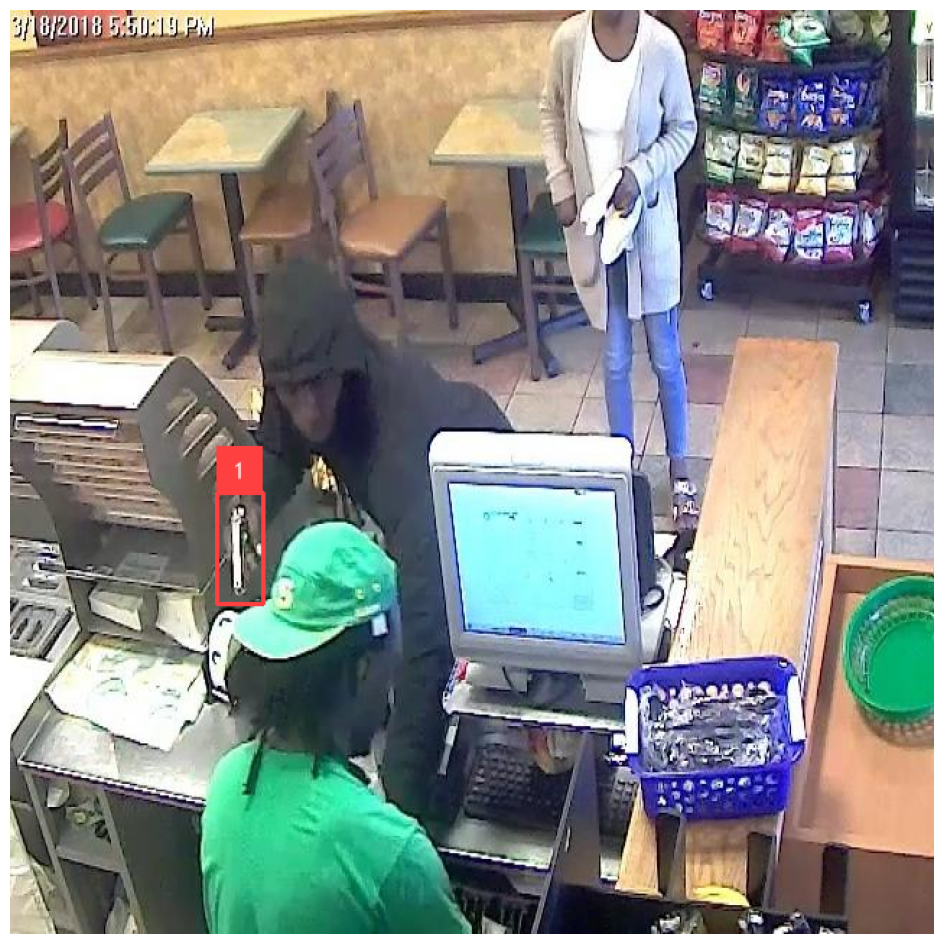

In [10]:
sv.plot_image(annotated_image)

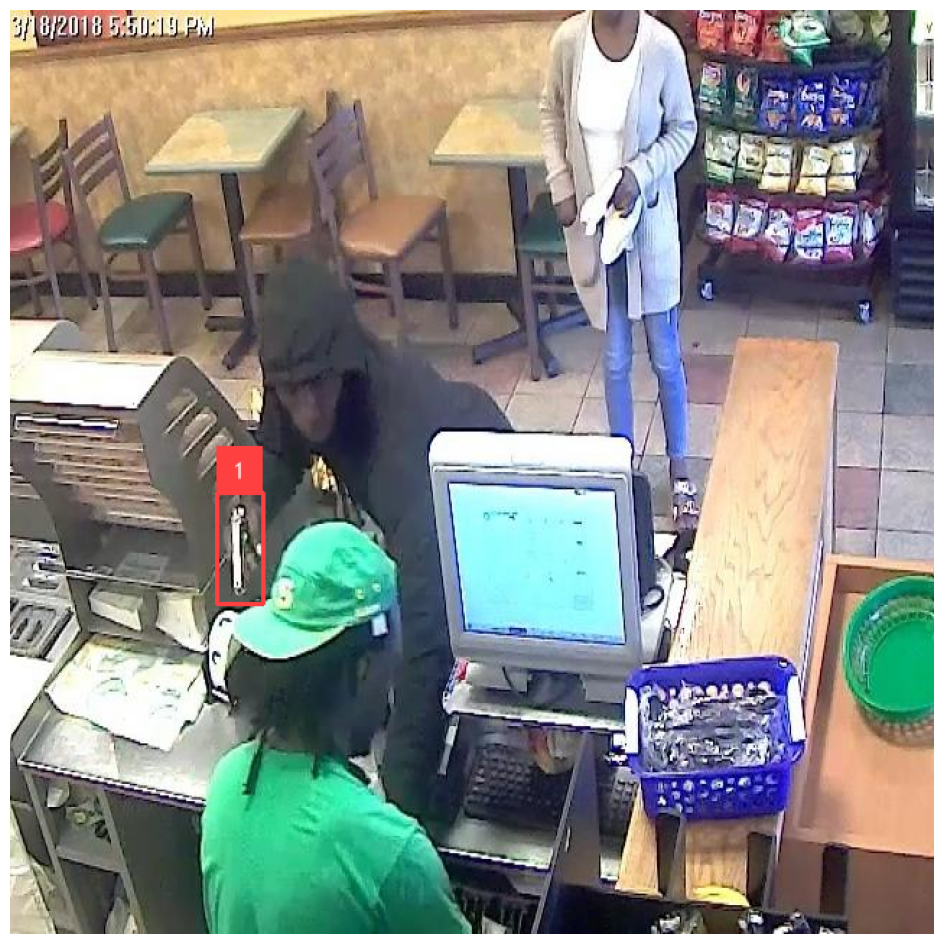

In [20]:
results = inference_detector(model, image)
detections = sv.Detections.from_mmdetection(result)
detections = detections[detections.confidence > 0.1]
    
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
sv.plot_image(annotated_image)

In [25]:
results

<DetDataSample(

    META INFORMATION
    ori_shape: (640, 640)
    img_path: None
    scale_factor: (1.0, 1.0)
    img_id: 0
    img_shape: (640, 640)
    batch_input_shape: (640, 640)
    pad_shape: (640, 640)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.7651, 0.0482, 0.0281, 0.0265, 0.0249, 0.0234, 0.0191, 0.0169, 0.0129,
                        0.0121, 0.0116, 0.0115, 0.0113, 0.0110], device='cuda:0')
            labels: tensor([1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='cuda:0')
            bboxes: tensor([[1.4360e+02, 3.3455e+02, 1.7591e+02, 4.1169e+02],
                        [3.9122e+02, 1.2222e+02, 4.2498e+02, 1.9503e+02],
                        [3.8703e+02, 1.0798e+02, 4.3924e+02, 1.9416e+02],
                        [1.0232e+02, 2.6116e+02, 1.3898e+02, 3.0863e+02],
                        [2.1565e+02, 5.7148e+02, 2.6305e+02, 6.3479e+02],
                     

In [29]:
def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = inference_detector(model, frame)
    detections = sv.Detections.from_mmdetection(results)
    detections = detections[detections.confidence > 0.5]
    
    annotated_image = bounding_box_annotator.annotate(scene=frame, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
    
    return annotated_image

In [30]:
sv.process_video(
    source_path="robbery.mp4",
    target_path="result.mp4",
    callback=callback
)